<a href="https://colab.research.google.com/github/Abhiie/ML_Lab/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


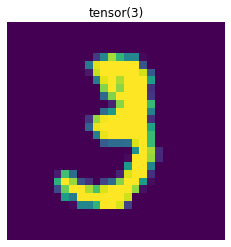

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)


num_features=784

features_train, features_test = features_train.reshape([-1, num_features]), features_test.reshape([-1, num_features])


features_train, features_test = features_train / 255., features_test / 255

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long


batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)


train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(featuresTrain[10].reshape(28,28))
plt.axis("off")
plt.title(str(targetsTrain[10]))
plt.savefig('graph.png')
plt.show()

In [ ]:
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out


input_dim = 28*28
hidden_dim = 150 
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)


error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
 
        optimizer.zero_grad()
        
   
        outputs = model(train)
        
   
        loss = error(outputs, labels)
     
        loss.backward()
        
      
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            
            correct = 0
            total = 0
          
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                
                outputs = model(test)
                
             
                predicted = torch.max(outputs.data, 1)[1]
              
                total += len(labels)

            
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
          
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
          
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8828208446502686  Accuracy: 53.380001068115234 %
Iteration: 1000  Loss: 0.6442434191703796  Accuracy: 85.1500015258789 %
Iteration: 1500  Loss: 0.6340178847312927  Accuracy: 88.16999816894531 %
Iteration: 2000  Loss: 0.30175256729125977  Accuracy: 89.9000015258789 %
Iteration: 2500  Loss: 0.2142685502767563  Accuracy: 90.94999694824219 %
Iteration: 3000  Loss: 0.34600624442100525  Accuracy: 91.66999816894531 %
Iteration: 3500  Loss: 0.21204130351543427  Accuracy: 92.58000183105469 %
Iteration: 4000  Loss: 0.2304713875055313  Accuracy: 93.80999755859375 %
Iteration: 4500  Loss: 0.3499712347984314  Accuracy: 93.94999694824219 %


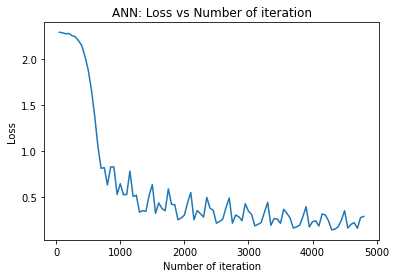

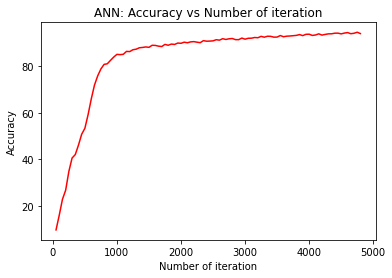

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()